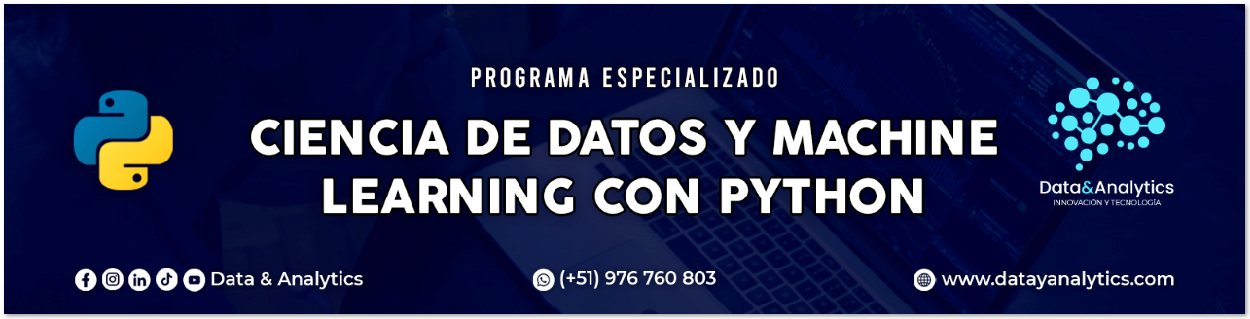

#DATA & ANALYTICS



----------------------------
SESIÓN N°: Introducción a Machine Learning

Instructor: 

E-mail: cursos@datayanalytics.com

Web: www.datayanalytics.com

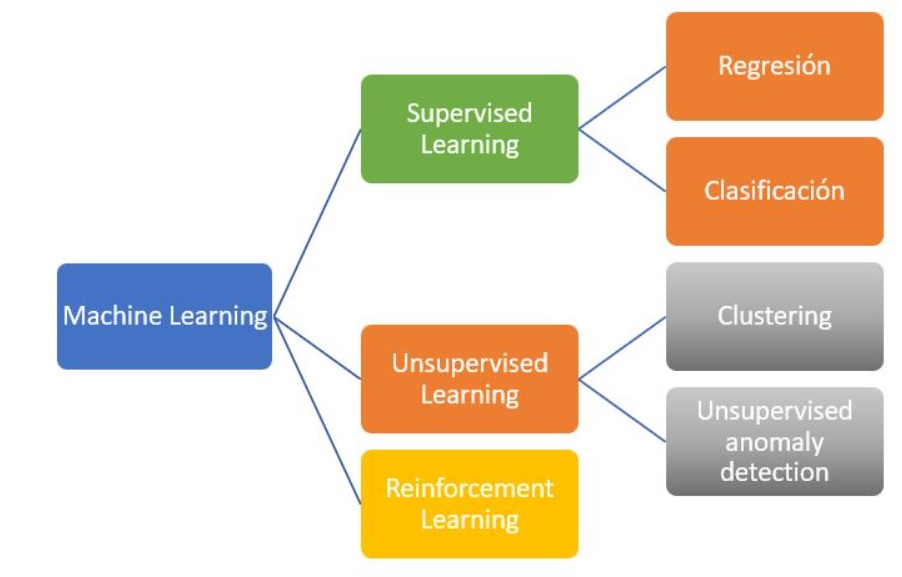

In [ ]:
#@title **Tipos de Algoritmos de Machine Learning**
from IPython.display import Image
Image("/content/drive/Images/machine_learning.jpg")

# **Supervised Learning modelo de Regresión mediante  Sklearn**

El aprendizaje automático es una rama de la inteligencia artificial que permite a los programas informáticos aprender y mejorar automáticamente a partir de la experiencia. Los algoritmos de aprendizaje automático aprenden de los conjuntos de datos y, luego, basándose en los patrones identificados en los conjuntos de datos, hacen predicciones sobre datos invisibles.

Los algoritmos de aprendizaje automático se pueden clasificar principalmente en dos tipos: algoritmos de aprendizaje supervisado y algoritmos de aprendizaje no supervisado.

Los algoritmos de aprendizaje automático supervisados son aquellos algoritmos en los que el conjunto de datos de entrada y la salida correspondiente o la predicción verdadera están disponibles, y los algoritmos intentan encontrar la relación entre las entradas y las salidas.

Sin embargo, en los algoritmos de aprendizaje automático no supervisados, no se conocen las verdaderas etiquetas de los resultados. Más bien, los algoritmos intentan encontrar patrones similares en los datos. Los algoritmos de agrupación en clústeres son un ejemplo típico de aprendizaje no supervisado.

Los algoritmos de aprendizaje supervisado se dividen en dos tipos: algoritmos de regresión y algoritmos de clasificación.

Los algoritmos de regresión predicen un valor continuo, por ejemplo, el precio de una casa, la presión arterial de una persona y la puntuación de un estudiante en un examen en particular. Los algoritmos de clasificación, por otro lado, predicen un valor discreto, como si un tumor es maligno o no, si un estudiante va a aprobar o reprobar un examen, etc.

En este módulo, estudiaremos cómo se pueden utilizar los algoritmos de aprendizaje automático para resolver problemas de regresión, es decir, predecir un valor continuo utilizando la biblioteca Sklearn (https://scikit-learn.org/stable/). 

## **1. Preparación de datos para problemas de regresión.**

Los algoritmos de aprendizaje automático requieren que los datos estén en un formato determinado antes de que los algoritmos puedan entrenarse con los datos. En esta sección, verá varios pasos de preprocesamiento de datos que debe realizar antes de poder entrenar algoritmos de aprendizaje automático utilizando la biblioteca `Sklearn`.


## **Información de los datos Compañía de Seguro**

Nuestro cliente es una compañía de seguros que ha brindado seguros médicos a sus clientes, ahora necesitan su ayuda para construir un modelo para predecir si los asegurados (clientes) del año pasado también estarán interesados ​​en el seguro para vehículos provisto por la compañía.

Una póliza de seguro es un acuerdo mediante el cual una empresa se compromete a proporcionar una garantía de compensación por una pérdida, daño, enfermedad o muerte específicos a cambio del pago de una prima específica. Una prima es una suma de dinero que el cliente debe pagar regularmente a una compañía de seguros por esta garantía.

Por ejemplo, puede pagar una prima de Rs. 5000 cada año para una cobertura de seguro de salud de Rs.200,000 / - de modo que si se enferma y necesita ser hospitalizado ese año, la compañía aseguradora asumirá el costo de la hospitalización, etc. por hasta Rs. 200.000. Ahora, si se pregunta cómo puede la empresa soportar un costo de hospitalización tan alto cuando cobra una prima de solo Rs. 5000 / -, ahí es donde entra en escena el concepto de probabilidades. Por ejemplo, como usted, puede haber 100 clientes que pagarían una prima de Rs. 5000 cada año, pero solo algunos de ellos (digamos 2-3) serían hospitalizados ese año y no todos. De esta forma, todos comparten el riesgo de todos los demás.

Al igual que el seguro médico, existe un seguro de vehículo en el que cada año el cliente debe pagar una prima de cierta cantidad a la compañía aseguradora para que, en caso de un accidente desafortunado con el vehículo, la compañía aseguradora proporcione una compensación (llamada 'suma asegurada' ) al cliente.

La construcción de un modelo para predecir si un cliente estaría interesado en el seguro de vehículos es extremadamente útil para la empresa porque, en consecuencia, puede planificar su estrategia de comunicación para llegar a esos clientes y optimizar su modelo comercial y sus ingresos.

Ahora, para predecir si el cliente estaría interesado en el seguro del vehículo, tiene información sobre los datos demográficos (sexo, edad, tipo de código de región), vehículos (antigüedad del vehículo, daños), póliza (prima, canal de abastecimiento), etc.

### **Descripción de datos**

**Variable	Definición**


* Gender:	Género del cliente
* Age:	Edad del cliente
* Driving_License: Licencia de conducir	0: el cliente no tiene DL, 1: el cliente ya tiene DL
* Region_code: Código de región	Código único para la región del cliente.
* Previously_Insured: Previamente_asegurado	1: el cliente ya tiene seguro de vehículo, 0: el cliente no tiene seguro de vehículo
* Vehicle_Age:	Antigüedad del vehículo
* Vehicle_Damage	1: El cliente sufrió daños en su vehículo en el pasado. 0: El cliente no ha dañado su vehículo en el pasado.
* Annual_Premium: Prima anual,	La cantidad que el cliente debe pagar como prima en el año.
* Policy_Sales_Channel: Política de Ventas Canal	Código anónimo para el canal de acercamiento al cliente, es decir. Diferentes agentes, por correo, por teléfono, en persona, etc.
* Vintage: Clásico,	Número de días que el cliente ha estado asociado con la empresa
* Response: Respuesta de si se suscriben a un seguro de vehículos. 0:No se suscribe a un seguro de vehículos, 1: sí se suscribe.

## **Planteamiento del problema:**
La compañía de seguros que brinda seguro médico a sus clientes ahora planea brindar un seguro para vehículos. La empresa quiere saber cuántos de sus clientes estarían interesados en seguros de vehículos.

La compañía quiere predecir la prima anual de cada uno de sus clientes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd
#Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Procesamiento de Datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/insurance.csv", sep=";")
df.head()

In [ ]:
df.describe()

Age  Driving_License    Region_Code  Previously_Insured  \
count  508146.000000    508146.000000  508146.000000       508146.000000   
mean       38.808413         0.997936      26.406572            0.458667   
std        15.500179         0.045388      13.224921            0.498289   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage       Response  
count   508146.000000         508146.000000  508146.000000  508146.000000  
mean     30554.453041            111.975838     154.340123       0.122528  
std      17146.574625             54.246027      83.668793       0.327895  
min       2630.000000              1.000000      10.000000       0.000000  
25%      24381.000000             26.000000      82.000000       0.000000  
50%      31661.000000            133.000000     154.000000       0.000000  
75%      39403.750000            152.000000     227.000000       0.000000  
max     540165.000000            163.000000     299.000000       1.000000

## **EDA**

In [ ]:
#Revisar la cantidad filas y el número de variables 
df.shape

(508146, 11)

In [ ]:
## Revisando si tenemos valores pérdidos
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
#Revisando los tipos de variables 
#object= Variables categoricas

df.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

In [ ]:
## Dividiendo las variables en categoricas y numericas
numerical_columns = ["Age","Driving_License","Region_Code",'Previously_Insured', "Annual_Premium", "Policy_Sales_Channel", "Vintage","Response"]
categorical_columns = ["Gender", 'Vehicle_Age', 'Vehicle_Damage']

    count  percent
0  445884     87.7
1   62262     12.3


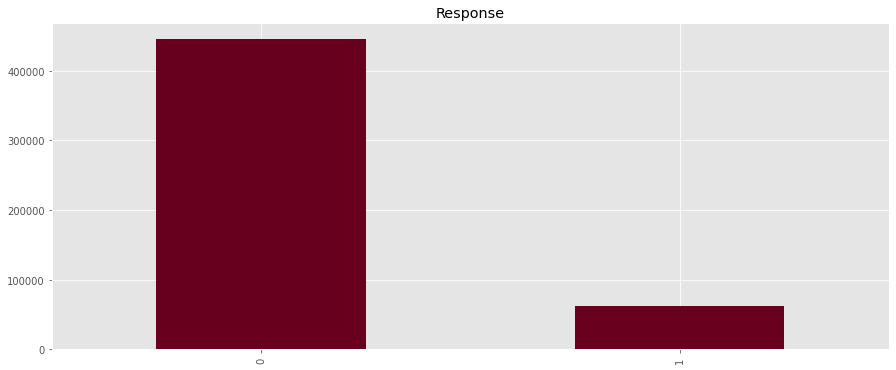

In [ ]:
### Comprobando si los datos están sesgados. 
plt.figure(figsize=(15, 6))
feature = numerical_columns[7]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
a1 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(a1)
count.plot(kind='bar', title=feature, grid=bool, cmap="RdBu" );

Como podemos ver los datos de la variable **Response** no están balanceado,Para el caso cuando trabajemos con Modelo de Supervised Learning para clasificación debemos balancear nuestro datos.

**Participación del Genero**

         count  percent
Male    274325     54.0
Female  233821     46.0


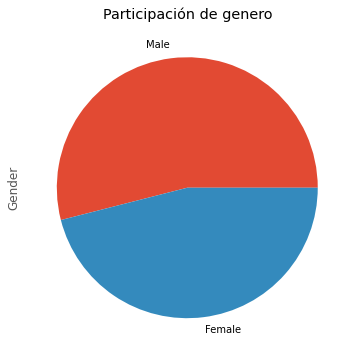

In [ ]:
plt.figure(figsize=(15, 6))
count = df["Gender"].value_counts()
percent = 100*df["Gender"].value_counts(normalize=True)
a1= pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(a1)
count.plot(kind='pie', title="Participación de genero");

**Distribución de género basada en la response**

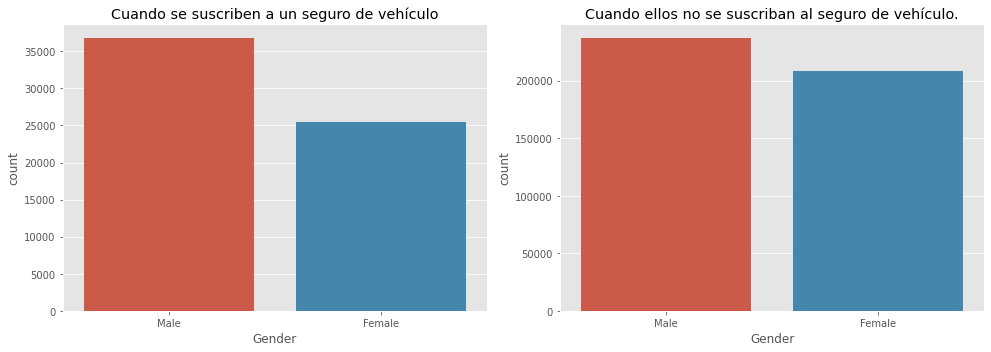

In [ ]:
### Gender distribution based on response
fig, axis = plt.subplots(1, 2, figsize = (14, 5))

sns.countplot(ax = axis[0], x = df[df["Response"] == 1]["Gender"])
axis[0].set_title("Cuando se suscriben a un seguro de vehículo")

sns.countplot(ax = axis[1], x =df[df["Response"] == 0]["Gender"])
axis[1].set_title("Cuando ellos no se suscriban al seguro de vehículo.")

fig.tight_layout()

De lo anterior podemos ver que los hombres tienden a suscribirse al seguro de vehículos más que las mujeres. Por lo tanto, podemos asumir que el género juega un papel importante en la construcción de modelos.

**Analizando el permiso de conducir**

   Gender  Driving_License
0  Female           233821
1    Male           274325


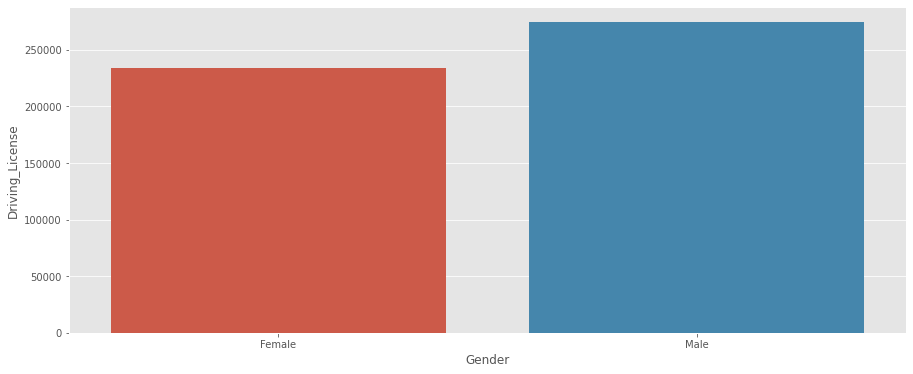

In [ ]:
### Analizando el permiso de conducir
plt.figure(figsize=(15, 6))
a2= df.groupby(["Gender"]).count()["Driving_License"].to_frame().reset_index()
print(a2)
sns.barplot(x = a2["Gender"], y = a2["Driving_License"]);

**Cliente previamente asegurado**

    count  percent
0  275076     54.1
1  233070     45.9


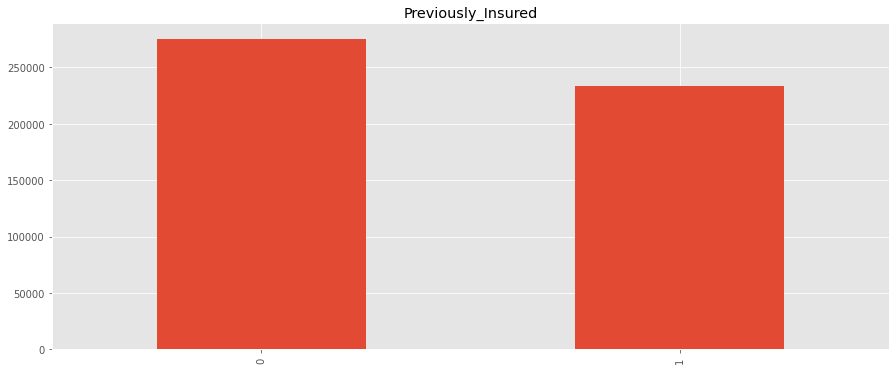

In [ ]:
plt.figure(figsize=(15, 6))
feature = numerical_columns[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
a3 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(a3)
count.plot(kind='bar', title=feature);

**Análisis de la antigüedad del vehículo**

            count  percent
1-2 Year   267015     52.5
< 1 Year   219805     43.3
> 2 Years   21326      4.2


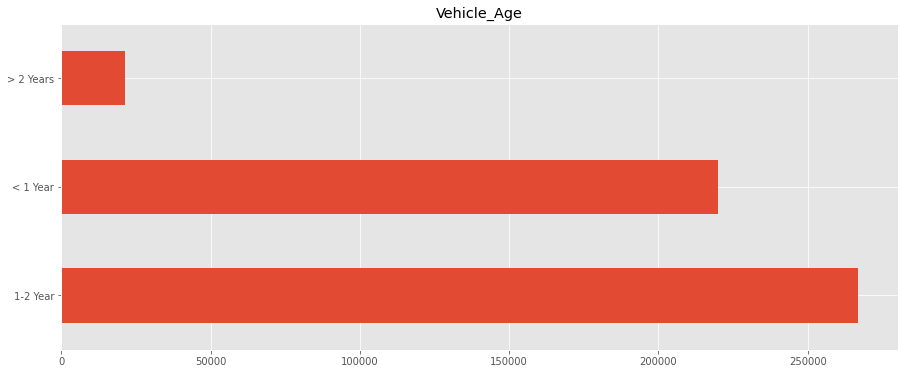

In [ ]:
plt.figure(figsize=(15, 6))
feature = categorical_columns[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
a4 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(a4)
count.plot(kind='barh', title=feature);

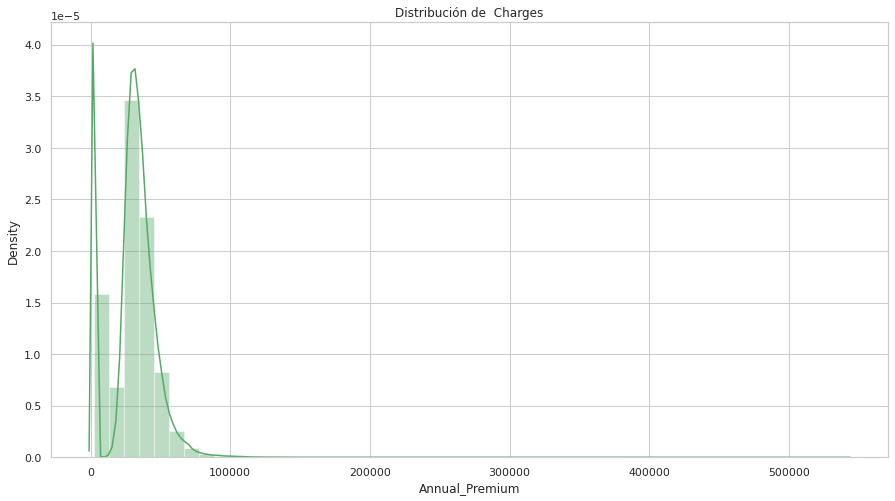

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(15, 8))
ax = sns.distplot(df['Annual_Premium'], kde = True, color = 'g')
plt.title('Distribución de  Charges');

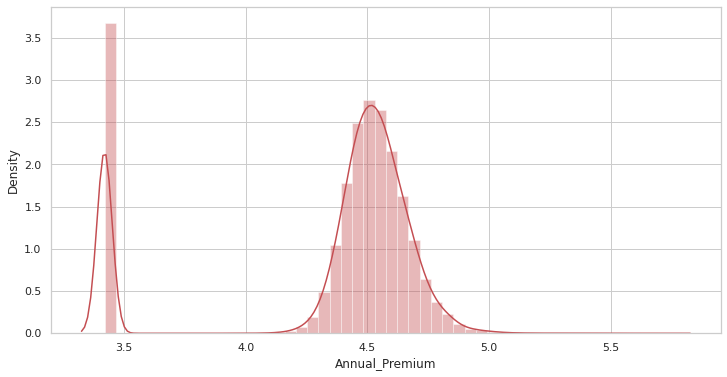

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 6));
ax = sns.distplot(np.log10(df["Annual_Premium"]), kde = True, color = 'r' );

**Distribuciones de factores**

La distribución de factores es relevante para la comprensión real de los datos subyacentes. Los actuarios también tienden a ajustarse a distribuciones estadísticas.

In [ ]:
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1           28                   0   > 2 Years   
1    Male   76                1            3                   0    1-2 Year   
2    Male   47                1           28                   0   > 2 Years   
3    Male   21                1           11                   1    < 1 Year   
4  Female   29                1           41                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes           40454                    26      217         1  
1             No           33536                    26      183         0  
2            Yes           38294                    26       27         1  
3             No           28619                   152      203         0  
4             No           27496                   152       39         0

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
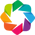

:Layout
   .Distribution.Age                  :Distribution   [Age]   (Density)
   .Distribution.Region_Code          :Distribution   [Region_Code]   (Density)
   .Distribution.Annual_Premium       :Distribution   [Annual_Premium]   (Density)
   .Distribution.Policy_Sales_Channel :Distribution   [Policy_Sales_Channel]   (Density)
   .Distribution.Vintage              :Distribution   [Vintage]   (Density)

In [ ]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

age = hv.Distribution(df['Age'],label="Age").opts(color="red")
reg = hv.Distribution(df['Region_Code'],label="Region_Code").opts(color="green")
prem = hv.Distribution(df['Annual_Premium'],label="Annual_Premium").opts(color="yellow")
chan = hv.Distribution(df['Policy_Sales_Channel'],label="Policy_Sales_Channel").opts(color="blue")
#vehage = hv.Distribution(df['Vehicle_Age'],label="Vehicle_Age").opts(color="purple")
vin = hv.Distribution(df['Vintage'],label="Vintage").opts(color="pink")
#+ 
(age + reg +prem + chan +  vin ).opts(opts.Distribution(xlabel="Values", ylabel="Density", width=400, height=300,tools=['hover'],show_grid=True)).cols(3)

### **1.1  División de datos en funciones y etiquetas**

Como primer paso, dividimos los datos en conjuntos de características y etiquetas. Nuestro conjunto de etiquetas consta de valores de la columna "propina", mientras que el conjunto de características consta de valores de las columnas restantes. El siguiente script divide los datos en conjuntos de características y etiquetas.

In [ ]:
  X = df.drop(["Annual_Premium"], axis=1)
  y = df["Annual_Premium"]#Target o objetivo

Imprimamos el conjunto de funciones.

In [ ]:
X.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1           28                   0   > 2 Years   
1    Male   76                1            3                   0    1-2 Year   
2    Male   47                1           28                   0   > 2 Years   
3    Male   21                1           11                   1    < 1 Year   
4  Female   29                1           41                   1    < 1 Year   

  Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  
0            Yes                    26      217         1  
1             No                    26      183         0  
2            Yes                    26       27         1  
3             No                   152      203         0  
4             No                   152       39         0

In [ ]:
X.shape

(508146, 10)

Y el siguiente script imprime el conjunto de etiquetas.

In [ ]:
y.head()

0    40454
1    33536
2    38294
3    28619
4    27496
Name: Annual_Premium, dtype: int64

### Feature Engineering

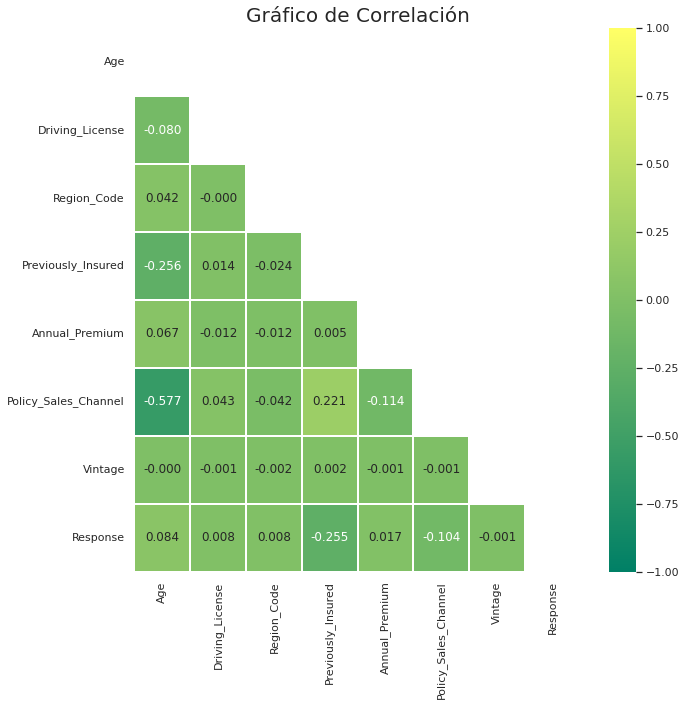

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

plt.figure(figsize = (10,10))
plt.title("Gráfico de Correlación", size=20)
sns.heatmap(df.corr(),annot=True, fmt=".3f",
            vmin=-1, vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="summer");

### **1.2. Conversión de datos categóricos en números**

Los algoritmos de aprendizaje automático, en su mayor parte, solo pueden funcionar con números. Por lo tanto, es importante convertir los datos categóricos a un formato numérico.

En este sentido, el primer paso es crear un conjunto de datos de todos los valores numéricos. Para hacerlo, elimine las columnas categóricas del conjunto de datos, como se muestra a continuación.

In [ ]:
print("Los valores únicos del año del vehiculo",df.Vehicle_Age.unique())
print("Los valores únicos del genero",df.Gender.unique())
print("Los valores únicos del genero",df.Vehicle_Damage.unique())

Los valores únicos del año del vehiculo ['> 2 Years' '1-2 Year' '< 1 Year']
Los valores únicos del genero ['Male' 'Female']
Los valores únicos del genero ['Yes' 'No']


In [ ]:
gender_map = {'Male':0,'Female':1}
vehicle_age_map = {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}
vehicle_damage_map = {'Yes':1,'No':0}

X['Gender']= X['Gender'].map(gender_map)
X['Vehicle_Age']= X['Vehicle_Age'].map(vehicle_age_map)
X['Vehicle_Damage']= X['Vehicle_Damage'].map(vehicle_damage_map)

X.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       0   44                1           28                   0            2   
1       0   76                1            3                   0            1   
2       0   47                1           28                   0            2   
3       0   21                1           11                   1            0   
4       1   29                1           41                   1            0   

   Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  
0               1                    26      217         1  
1               0                    26      183         0  
2               1                    26       27         1  
3               0                   152      203         0  
4               0                   152       39         0

### **1.3. Divida los datos en conjuntos de prueba y entrenamiento**

Después de entrenar un algoritmo de aprendizaje automático, debe evaluarlo para ver qué tan bien funciona con datos invisibles. Por lo tanto, dividimos el conjunto de datos en dos conjuntos, es decir, un conjunto de entrenamiento y un conjunto de prueba. El conjunto de datos se entrena a través del conjunto de entrenamiento y se evalúa en el conjunto de prueba. Para dividir los datos en conjuntos de entrenamiento y prueba, puede usar la función `train_test_split ()` de la biblioteca Sklearn, como se muestra a continuación. El seguimiento El script divide los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2021)

In [ ]:
print("Datos originales",X.shape)
print("Datos para el entrenamiento",X_train.shape)
print("Datos para prueba",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Datos originales (508146, 10)
Datos para el entrenamiento (406516, 10)
Datos para prueba (101630, 10)
(406516,)
(101630,)


In [ ]:
X_train.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
221746       1   23                1           14                   1   
85785        0   26                1           47                   1   
325015       0   43                1           30                   1   
4921         0   47                1           19                   0   
83753        0   23                1           46                   1   

        Vehicle_Age  Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  
221746            0               0                   152      149         0  
85785             0               0                   152      116         0  
325015            1               0                   152      260         0  
4921              1               1                   157      243         1  
83753             0               0                   151      288         0

### **1.4. Escalado / normalización de datos**

El paso final (opcional) antes de que los datos se pasen a los algoritmos de aprendizaje automático es escalar los datos. Puede ver que algunas columnas del conjunto de datos contienen valores pequeños, mientras que otras contienen valores muy grandes. Es mejor convertir todos los valores a una escala uniforme. Para hacerlo, puede usar la función `StandardScaler ()` del módulo `sklearn.preprocessing`, como se muestra a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

La más relevante es la relación entre "Respuesta" y el resto de variables. En este caso veo alguna correlación entre Respuesta y "Vehicle_Damage", además hay una relación negativa con la variable binaria "Previously_Insured". Otras relaciones interesantes:
* la edad está fuertemente correlacionada con la edad del automóvil. Es bien sabido en la relación actuarial mundial que los jóvenes conducen automóviles viejos
* edad con canal de ventas, las personas mayores tienden a usar corredores y agentes, los jóvenes usan Internet
* previamente asegurado se correlaciona con la edad y la edad del vehículo. Los jóvenes tienden a cambiar de aseguradora a menudo
* previamente asegurado con daños en el vehículo, de hecho, muchos titulares de polos cambian de asegurador mientras corren un gran riesgo
* ** Antigüedad del vehículo y canal de venta de pólizas: este es un efecto espurio interesante. El efecto subyacente real es la relación entre la edad y el canal de ventas, lo que influye indirectamente en las cifras de la antigüedad del vehículo **

En el gráfico anterior podemos ver la correlación entre cada característica. Si dos características están altamente correlacionadas, podemos eliminar una de ellas porque tienden a sobreajustarse a los datos y también debemos asegurarnos de considerar todas las características que están altamente correlacionadas con la salida para que ayuden a una mejor predicción.

Hemos convertido los datos a un formato que se puede utilizar para entrenar algoritmos de aprendizaje automático para la regresión desde la biblioteca de `Sklearn`. Los detalles, incluidas las funcionalidades y el uso de todos los algoritmos de aprendizaje automático, están disponibles en este enlace. Puede verificar todos los algoritmos de regresión yendo a ese enlace.


## **2. Regresión lineal**

La regresión lineal es un modelo lineal que supone una relación lineal entre las entradas y las salidas y minimiza el costo del error entre la salida prevista y la real utilizando funciones como el error absoluto medio entre diferentes puntos de datos.

En este apartado, veremos los modelos de aprendizaje automático supervisado más comunes. Los algoritmos de aprendizaje automático supervisado funcionan de manera diferente a los modelos de series temporales.

En los modelos de aprendizaje automático supervisado, intenta identificar relaciones entre diferentes variables:

* Variable objetivo: la variable que intenta pronosticar
* Variables explicativas: Variables que te ayudan a predecir la variable objetivo

Para la previsión, es importante comprender qué tipos de variables explicativas puede o no utilizar. Como ejemplo, digamos que las ventas de chocolate caliente dependen fuertemente de la temperatura. Cuando el clima es frío, las ventas son altas. Cuando el clima es cálido, las ventas son bajas.





## **La idea detrás de la regresión lineal**
La idea detrás de la regresión lineal es definir una relación lineal entre una variable objetivo y numerosas variables explicativas para predecir la variable objetivo. La regresión lineal se usa ampliamente, no solo para pronosticar. Como cualquier modelo supervisado, siempre y cuando coloque variables explicativas del futuro como entrada al modelo, esto funciona perfectamente.

## **Definición del modelo**
La regresión lineal se define de la siguiente manera:

$$y=\beta_0+\beta_1 x_1+\beta_2 x_2+\cdots+\beta_p x_p $$

En esta fórmula
* Existen $p$ variables explicativas, denominadas $x$.
* Hay una variable objetivo llamada $y$.
* El valor de $y$ se calcula como una constante ($\beta_0$) más los valores de las variables $x$ multiplicados por sus coeficientes $\beta_1$ a $\beta_p$.

La figura de abajo se muestra cómo interpretar $\beta_0$ y $\beta_1$ visualmente. Muestra que para un aumento de 1 en la variable $x$, el aumento en la variable y representa $\beta_1$. $\beta_0$ es el valor de $y$ cuando $x$ es 0.

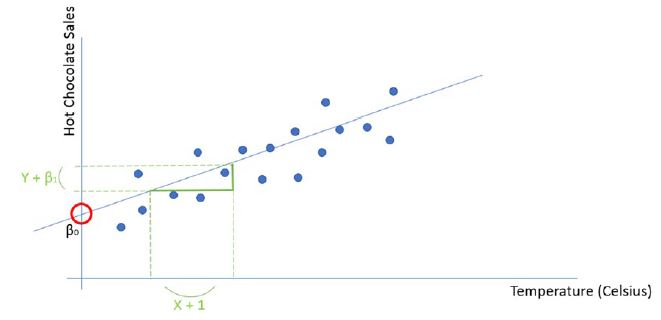

In [ ]:
#@title
#@Interpretación de Regresión Lineal
from IPython.display import Image
Image("/content/drive/MyDrive/Curso de ML 3 version/Sesión N° 03/imagen/Visual interpretation of linear regression.JPG")

Para poder usar la regresión lineal, debe estimar los coeficientes (betas) en un conjunto de datos de entrenamiento. Luego, los coeficientes se pueden estimar utilizando la siguiente fórmula, en notación matricial:

$$\hat \beta=(X^T X)^{-1} X^T y $$

Esta fórmula se conoce como MCO: el método de los mínimos cuadrados ordinarios. Este modelo es muy rápido de ajustar, ya que solo requiere cálculos matriciales para calcular las betas. Aunque es fácil de instalar, es menos adecuado para procesos más complejos. Después de todo, es un modelo lineal y, por lo tanto, solo puede ajustarse a procesos lineales.

Un modelo lineal puede ajustarse a cualquier tipo de relación que vaya en una dirección. Un ejemplo de esto es “si sube la temperatura, bajan las ventas de chocolate caliente”. Sin embargo, los modelos lineales no pueden adaptarse a nada no lineal. Un ejemplo de un proceso no lineal es este: “si la temperatura está bajo cero, las ventas de chocolate caliente son bajas; si la temperatura está entre cero y 10, las ventas de chocolate caliente son altas; si la temperatura es alta, las ventas de chocolate caliente son bajas”.

Como puede ver, el segundo ejemplo no es lineal porque no se podría trazar una línea recta desde las ventas bajas hasta las altas de chocolate caliente. Más bien, podría hacer mejor una declaración if/else para capturar esta lógica.

Debe tener en cuenta que los modelos lineales no son muy buenos para capturar tendencias no lineales. Sin embargo, los modelos no lineales, cuando se ajustan correctamente, a menudo pueden aproximarse bastante bien a las tendencias lineales. Esta es la razón por la que muchas de las técnicas de aprendizaje automático más avanzadas utilizan muchos enfoques no lineales.

### **2.1. ¿Por qué utilizar el algoritmo de regresión lineal?**

El algoritmo de Regresión lineal es particularmente útil cuando:

1. La regresión lineal es un algoritmo fácil de implementar y de interpretar
2. Se necesita menos tiempo de entrenamiento para entrenar incluso para grandes conjuntos de datos.
3. Los coeficientes de regresión lineal son fáciles de interpretar.

### **2.2. Desventajas del algoritmo de regresión lineal**

Las siguientes son las desventajas del Regresión lineal.

1. El rendimiento se ve afectado fácilmente por la presencia de valores atípicos.
2. Asume que una relación lineal entre variables dependientes e independientes puede resultar en un error mayor.

### **2.3. Implementación de regresión lineal con Sklearn**

Para implementar la regresión lineal con `Sklearn`, puede usar la clase LinearRegression del módulo sklearn.linear_model. Para entrenar el algoritmo, los conjuntos de entrenamiento y prueba, es decir, `X_train` y `X_test` en nuestro caso, se pasan al método `fit ()` del objeto de la clase LinearRegression. El conjunto de prueba se pasa al método `predict ()` de la clase para realizar predicciones. El proceso de entrenamiento y realización de predicciones con el algoritmo de regresión lineal es el siguiente:

In [ ]:
from sklearn.linear_model import LinearRegression
# Llamar al objeto o función 
lin_reg = LinearRegression()

#Entrenamos el modelo
regressor = lin_reg.fit(X_train, y_train)

# Hacemos de predicciones del modelo con el conjunto de prueba (Test)
y_pred_lr = regressor.predict(X_test)

In [ ]:
y_pred_lr[0:9]

array([29309.81273197, 34796.66348426, 34344.23255113, 32576.48678827,
       29369.71371003, 30738.45092685, 28129.71211234, 35381.57740078,
       28806.45493669])

In [ ]:
list(y_test[0:9])

[42280, 2630, 27341, 56388, 27776, 38049, 2630, 2630, 34011]

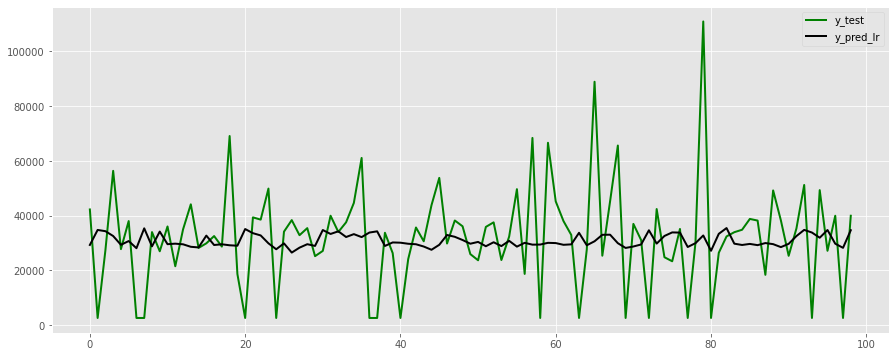

In [ ]:
plt.figure(figsize=(15, 6))
#plt.scatter(list(X_train), list(y_train), c="k", label="training samples")
plt.plot(list(y_test[0:99]),  c="g", label="y_test", linewidth=2)
plt.plot(y_pred_lr[0:99], c="k", label="y_pred_lr", linewidth=2)
plt.legend(loc='best')
plt.show();

### **2.4 Coeficiente del modelo**

In [ ]:
# The coefficients
print('Coeficientes: \n',lin_reg.coef_ )
print("--"*30)
print("Intercepto : ", lin_reg.intercept_)
print("--"*30)
list(zip(X,lin_reg.coef_) )

Coeficientes: 
 [  121.65784266   677.15523389  -103.79021067  -283.82668859
   859.03371147  -856.66208004   508.8862469  -2106.56109944
   -34.18449542   251.31003584]
------------------------------------------------------------
Intercepto :  30555.39915772073
------------------------------------------------------------


[('Gender', 121.65784265950998),
 ('Age', 677.1552338882043),
 ('Driving_License', -103.79021066641498),
 ('Region_Code', -283.82668859297405),
 ('Previously_Insured', 859.0337114703209),
 ('Vehicle_Age', -856.6620800359781),
 ('Vehicle_Damage', 508.88624690270296),
 ('Policy_Sales_Channel', -2106.561099443938),
 ('Vintage', -34.18449542380021),
 ('Response', 251.31003583799418)]

### **2.5 Calcula el MSE**

In [ ]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_lr))

Mean squared error: 286716174.09


### **2.6 Coeficiente de Determinación**

In [ ]:
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f'
      % r2_score(y_test, y_pred_lr))

Coeficiente de determinación: 0.02


### **2.7 Tipos de Metricas**

Una vez que haya entrenado un modelo y haya hecho predicciones en el conjunto de prueba, el siguiente paso es saber qué tan bien se ha desempeñado su modelo para hacer predicciones en el conjunto de prueba desconocido. Hay varias métricas para comprobarlo. Sin embargo, el error absoluto medio, el error cuadrático medio y el error cuadrático medio medio son tres de las métricas más comunes.

**R2**

La métrica R2 (R cuadrado) es una métrica que está muy cerca de la métrica 1 - MAPE. Es una métrica de rendimiento en lugar de una métrica de error, lo que la hace ideal para la comunicación.

El R2 es un valor que tiende a estar entre 0 y 1, siendo 0 malo y 1 perfecto. Por lo tanto, se puede usar fácilmente como un porcentaje multiplicándolo por 100. El único caso en el que el R2 puede ser negativo es si su pronóstico es más del 100 % incorrecto.

$$R^2=\frac{\sum(y_i -\hat y_i)^2 }{\sum (y_i -\bar y_i )^2} $$

La fórmula hace un cálculo interesante. Calcula una relación entre la suma de los errores al cuadrado y la suma de las desviaciones entre el pronóstico y el promedio. Esto se reduce a un porcentaje de aumento de su modelo sobre el uso del promedio como modelo. Si su modelo es una predicción tan mala como usar el promedio, entonces el R2 será cero. Como el promedio se usa a menudo como modelo de referencia, esta es una métrica de rendimiento muy práctica.

**Error absoluto medio(Mean Absolute Error MAE)**

El error absoluto medio (MAE) se calcula tomando el promedio del error absoluto obtenido al restar los valores reales de los valores predichos. La ecuación para calcular MAE es:

$$MAE=\frac{\Sigma_{i=1}^{n} |y_i-\hat{y}|}{n} $$

**Error medio cuadrado (Mean Squared Error MSE)**

El error cuadrático medio (MSE) es similar al MAE. Sin embargo, el error para cada registro se eleva al cuadrado en el caso de MSE para castigar los registros de datos con una gran diferencia entre los valores predichos y reales. La ecuación para calcular el error cuadrático medio es la siguiente:

$$MSE=\frac{1}{n} \Sigma_{i=1}^{n} (y_i-\hat{y})^2 $$

**Root Mean Squared Error**

El error cuadrático medio es simplemente la raíz inferior del error cuadrático medio y se puede calcular de la siguiente manera:

$$RMSE=\sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i-\hat{y})^2  } $$

Los métodos utilizados para encontrar el valor de estas métricas están disponibles en la clase `sklearn.metrics`. Los valores predichos y reales deben pasarse a estos métodos, como se muestra en el resultado.

In [ ]:
from sklearn import metrics

print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_lr))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_lr))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f'% r2_score(y_test, y_pred_lr))

Mean Absolute Error: 12016.355811102561
Mean Squared Error: 286716174.0887408
Root Mean Squared Error: 16932.695417113628
Coeficiente de determinación: 0.02


In [ ]:
y.describe()

count    508146.000000
mean      30554.453041
std       17146.574625
min        2630.000000
25%       24381.000000
50%       31661.000000
75%       39403.750000
max      540165.000000
Name: Annual_Premium, dtype: float64

Aquí está la salida. Al observar el error absoluto medio, se puede concluir que, en promedio, hay un error de 12016 para las predicciones.

##  **3. Modelo KNN para Regresión**

El KNN significa K-nearest neighbors. KNN es un algoritmo de aprendizaje automatico, que se basa en encontrar la distancia euclidiana entre diferentes puntos de datos.

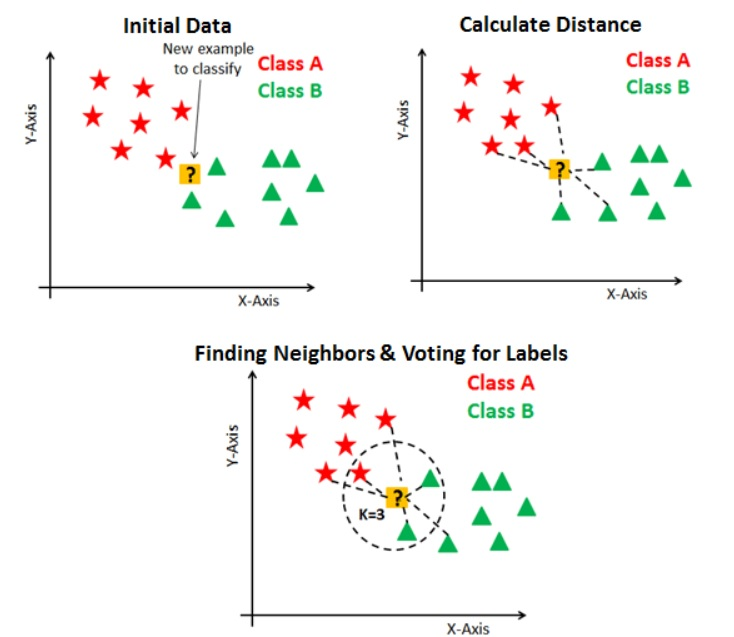

In [ ]:
#@title Algoritmo KNN
from IPython.display import Image
Image("/content/drive/MyDrive/Images/knn.jpg")

**Los pasos que se siguen en k-vecino más cercano son los siguientes:**
1. Recibimos el conjunto de datos sin procesar y sin clasificar que hay que trabajar.
2. Elegimos una matriz de distancias de la euclidiana, Manhattan o Minkowski.
3. Luego calcule la distancia entre los nuevos datos puntos y los puntos de datos de entrenamiento clasificados conocidos.
4. El número de vecinos a considerar es definida por el valor de “k”.
5. Se sigue comparando con la lista de clases. que tienen la distancia más corta y cuentan las número de veces que aparece cada clase.
6. La clase con la mayor cantidad de votos gana. Esto significa que la clase que tiene la frecuencia más alta y ha aparecido el mayor número de veces es asignado al punto de datos desconocido.

**Métodos de cálculo de la distancia entre puntos**
El primer paso es calcular la distancia entre el nuevo punto y cada punto de entrenamiento. Existen varios métodos para calcular esta distancia, de los cuales los métodos más comúnmente conocidos son: euclidiano, Manhattan (para continuo) y distancia de Hamming (para categórico).

1. Distancia euclidiana: probablemente la forma más común y sencilla de calcular entre dos puntos. Es raíz cuadrada de la suma de los cuadrados de las distancias:
$$Euclidean=\sqrt{(y_2-y_1)^2+(x_2-x_1)^2} $$

2. **Distancia de Manhattan:** La distancia entre dos puntos medida a lo largo de ejes en ángulo recto. A veces también se le conoce como distancia de cuadra de la ciudad. En un plano con $p_1$ en $(x_1, y_1)$ y $p_2$ en $(x_2, y_2)$, es

$$Manhattan=|x_1-x_2|+|y_1-y_2| $$

3. **Distancia de Minkowski:** Esta es una métrica en un espacio vectorial normado. La distancia de Minkowski se utiliza para la similitud de distancia de los vectores. Dados dos o más vectores, encuentre la similitud de distancia de estos vectores. Principalmente, la distancia de Minkowski se aplica en ML para averiguar la similitud de la distancia. Es una métrica de distancia generalizada y se puede representar mediante la siguiente fórmula:

$$Minkowski={(\sum_{i=1}^{n}|x_i-y_i|^p )^{1/p} } $$

donde usando diferentes valores de p podemos obtener diferentes valores de distancias. Con el valor de $p = 1$ tenemos obtener la distancia de Manhattan, con $p = 2$ obtenemos euclidiana distancia, y con $p= ∞$ obtenemos la distancia de Chebychev (https://www.youtube.com/watch?v=XP5L5mrUaDw).

4. **Cosine Similarity:** Es una medida de semejanza entre dos vectores distintos de cero de un producto interno espacio que mide el coseno del ángulo entre ellos. El coseno de 0° es 1, y es menor que 1 para cualquier ángulo en el intervalo $(0,π]$ radianes.

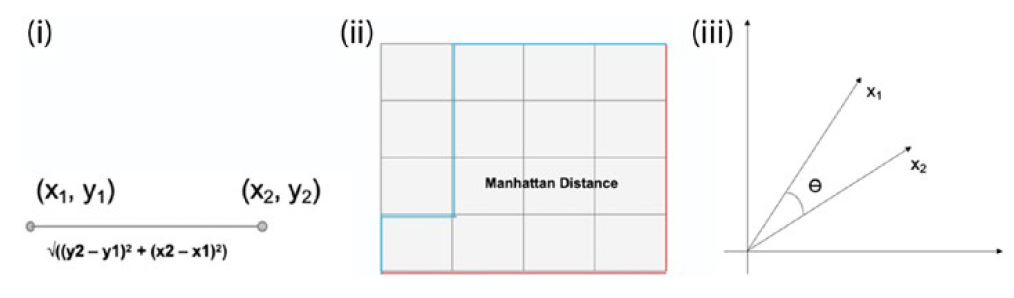

In [ ]:
#@title *(i) Euclidean distance; (ii) Manhattan distance; (iii) cosine similarity**
from IPython.display import Image
Image("/content/drive/MyDrive/Curso de ML 3 version/Sesión N° 03/imagen/distancia.JPG")

**¿Por qué utilizar el algoritmo KNN?**

El algoritmo KNN es particularmente útil cuando:

1. El algoritmo KNN no asume ninguna relación entre las características.
2. Útil para un conjunto de datos donde la localización de datos es importante.
3. Solo tienes que sintonizar el parámetro K, que es el número de vecino más cercano
4. No se necesita entrenamiento, ya que es un algoritmo de aprendizaje perezoso.
5. Sistemas de recomendación y búsqueda de similitudes semánticas entre las principales aplicaciones del algoritmo KNN.

**Desventajas del algoritmo KNN**

Las siguientes son las desventajas del algoritmo KNN.
1. Tiene que encontrar el valor óptimo de K, lo cual no es fácil.
2. No apto para datos de dimensiones muy elevadas.

### **3.1. Preparación de datos para problemas de regresión.**

Los algoritmos de aprendizaje automático requieren que los datos estén en un formato determinado antes de que los algoritmos puedan entrenarse con los datos. En esta sección, verá varios pasos de preprocesamiento de datos que debe realizar antes de poder entrenar algoritmos de aprendizaje automático utilizando la biblioteca `Sklearn`.

Para leer un conjunto de datos en particular en el marco de datos de Pandas

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/insurance.csv", sep=";")
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1           28                   0   > 2 Years   
1    Male   76                1            3                   0    1-2 Year   
2    Male   47                1           28                   0   > 2 Years   
3    Male   21                1           11                   1    < 1 Year   
4  Female   29                1           41                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes           40454                    26      217         1  
1             No           33536                    26      183         0  
2            Yes           38294                    26       27         1  
3             No           28619                   152      203         0  
4             No           27496                   152       39         0

### **3.2  División de datos en funciones y etiquetas**

Como primer paso, dividimos los datos en conjuntos de características y etiquetas. Nuestro conjunto de etiquetas consta de valores de la columna "propina", mientras que el conjunto de características consta de valores de las columnas restantes. El siguiente script divide los datos en conjuntos de características y etiquetas.

In [ ]:
nuevo=df.sample(frac=0.7)

In [ ]:
X = nuevo.drop(["Annual_Premium"], axis=1)
y = nuevo["Annual_Premium"]
#visualizamos los datos
X.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
501657  Female   45                1           30                   1   
114507    Male   42                1           28                   0   
320286    Male   41                1           28                   0   
431741    Male   37                1           28                   0   
91307     Male   23                1            8                   0   

       Vehicle_Age Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  
501657    1-2 Year             No                   152      242         0  
114507    1-2 Year            Yes                    26      170         1  
320286    1-2 Year            Yes                   124      173         0  
431741    1-2 Year            Yes                   124      109         0  
91307     < 1 Year            Yes                   152      204         1

Y el siguiente script imprime el conjunto de etiquetas.

In [ ]:
y.head()

501657    38914
114507    32558
320286    32112
431741    57302
91307     58030
Name: Annual_Premium, dtype: int64

### **3.3. Conversión de datos categóricos en números**

Los algoritmos de aprendizaje automático, en su mayor parte, solo pueden funcionar con números. Por lo tanto, es importante convertir los datos categóricos a un formato numérico.

En este sentido, el primer paso es crear un conjunto de datos de todos los valores numéricos. Para hacerlo, elimine las columnas categóricas del conjunto de datos, como se muestra a continuación.

In [ ]:
#Eliminamos las variables categoricas
numerical = X.drop(["Gender", 'Vehicle_Age', 'Vehicle_Damage' ], axis = 1)

El resultado a continuación muestra que el marco de datos "numérico" contiene sólo columnas numéricas.

In [ ]:
#Solo tenemos las variables numéricas
numerical.head()

Age  Driving_License  Region_Code  Previously_Insured  \
501657   45                1           30                   1   
114507   42                1           28                   0   
320286   41                1           28                   0   
431741   37                1           28                   0   
91307    23                1            8                   0   

        Policy_Sales_Channel  Vintage  Response  
501657                   152      242         0  
114507                    26      170         1  
320286                   124      173         0  
431741                   124      109         0  
91307                    152      204         1

A continuación, debe crear un marco de datos que contenga solo columnas categóricas.

In [ ]:
#Guardamos las variables categorica en una variable que se llama categorica
categorical = X.filter(["Gender", 'Vehicle_Age', 'Vehicle_Damage' ])
categorical.head()

Gender Vehicle_Age Vehicle_Damage
501657  Female    1-2 Year             No
114507    Male    1-2 Year            Yes
320286    Male    1-2 Year            Yes
431741    Male    1-2 Year            Yes
91307     Male    < 1 Year            Yes

Uno de los enfoques más comunes para convertir una columna categórica en una numérica es mediante la codificación **one-hot**. En la codificación one-hot, para cada valor único en las columnas originales, se crea una nueva columna. Por ejemplo, para el sexo, se crean dos columnas: Femenino y Masculino. Si la columna de sexo original contenía hombre, se agrega un 1 en la columna Hombre recién creada, y se agrega 0 si es mujer.

Sin embargo, se puede observar que realmente no necesitamos dos columnas. Una sola columna, es decir, Mujer es suficiente, ya que cuando un cliente es mujer, podemos agregar 1 en la columna Mujer, de lo contrario, se puede agregar 1 en esa columna. Por lo tanto, necesitamos N-1 columnas codificadas en caliente para todos los N valores en la columna original.

El siguiente script convierte columnas categóricas en columnas codificadas en un solo uso utilizando el método `pd.get_dummies ()`.

In [ ]:
import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

Gender_Male  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
501657            0                     0                      0   
114507            1                     0                      0   
320286            1                     0                      0   
431741            1                     0                      0   
91307             1                     1                      0   

        Vehicle_Damage_Yes  
501657                   0  
114507                   1  
320286                   1  
431741                   1  
91307                    1

La salida muestra las columnas codificadas **one-hot** recién creadas.

El paso final es unir las columnas numéricas con las columnas codificadas en caliente. Para hacerlo, puede usar la función `concat ()` de la biblioteca Pandas como se muestra a continuación:

In [ ]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

Age  Driving_License  Region_Code  Previously_Insured  \
501657   45                1           30                   1   
114507   42                1           28                   0   
320286   41                1           28                   0   
431741   37                1           28                   0   
91307    23                1            8                   0   

        Policy_Sales_Channel  Vintage  Response  Gender_Male  \
501657                   152      242         0            0   
114507                    26      170         1            1   
320286                   124      173         0            1   
431741                   124      109         0            1   
91307                    152      204         1            1   

        Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
501657                     0                      0                   0  
114507                     0                      0                   1  
320286                     0                      0                   1  
431741                     0                      0                   1  
91307                      1                      0                   1

### **3.4. Divida los datos en conjuntos de prueba y entrenamiento**

Después de entrenar un algoritmo de aprendizaje automático, debe evaluarlo para ver qué tan bien funciona con datos invisibles. Por lo tanto, dividimos el conjunto de datos en dos conjuntos, es decir, un conjunto de entrenamiento y un conjunto de prueba. El conjunto de datos se entrena a través del conjunto de entrenamiento y se evalúa en el conjunto de prueba. Para dividir los datos en conjuntos de entrenamiento y prueba, puede usar la función `train_test_split ()` de la biblioteca Sklearn, como se muestra a continuación. El seguimiento El script divide los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### **3.5. Escalado / normalización de datos**

El paso final (opcional) antes de que los datos se pasen a los algoritmos de aprendizaje automático es escalar los datos. Puede ver que algunas columnas del conjunto de datos contienen valores pequeños, mientras que otras contienen valores muy grandes. Es mejor convertir todos los valores a una escala uniforme. Para hacerlo, puede usar la función `StandardScaler ()` del módulo `sklearn.preprocessing`, como se muestra a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

Hemos convertido los datos a un formato que se puede utilizar para entrenar algoritmos de aprendizaje automático para la regresión desde la biblioteca de Sklearn. Los detalles, incluidas las funcionalidades y el uso de todos los algoritmos de aprendizaje automático.

### **3.6. Implementación del algoritmo KNN con SKlearn**

Con `Sklearn`, es extremadamente fácil implementar la regresión KNN. Para hacerlo, puede usar la clase `KNeighborsRegressor`. El proceso de entrenamiento y prueba es el mismo que el de la regresión lineal. Para el entrenamiento, debe llamar al método `fit ()` y, para las pruebas, debe llamar al método `predict ()`.

El siguiente script muestra el proceso de entrenamiento, prueba y evaluación del algoritmo de regresión KNN para predecir los valores de la columna de sugerencias del conjunto de datos de sugerencias.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
#llamo al objeto o a la función 
KNN_reg = KNeighborsRegressor(n_neighbors=5)
# Entrenamiento de lo modelo 
regressor = KNN_reg.fit(X_train, y_train)
#Predición de modelo
y_pred_knn = regressor.predict(X_test)

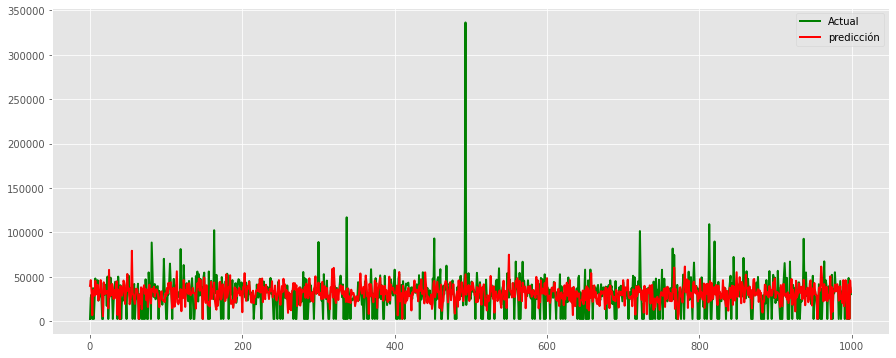

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test.iloc[0:1000]),  c="g", label="Actual", linewidth=2)
plt.plot(y_pred_knn[0:1000], c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

Parece que el Modelo KNN se ajusto bien, los valores pronosticados siguen los valores reales 

Finalmente, evaluaré el modelo con diferentes tipos de metricas en el conjunto de prueba (línea de base contra la extrapolación):

### **3.7 Tipos de Metricas**

Una vez que haya entrenado un modelo y haya hecho predicciones en el conjunto de prueba, el siguiente paso es saber qué tan bien se ha desempeñado su modelo para hacer predicciones en el conjunto de prueba desconocido. Hay varias métricas para comprobarlo. Sin embargo, el error absoluto medio, el error cuadrático medio y el error cuadrático medio medio son tres de las métricas más comunes.

**Error absoluto medio(Mean Absolute Error MAE)**

El error absoluto medio (MAE) se calcula tomando el promedio del error absoluto obtenido al restar los valores reales de los valores predichos. La ecuación para calcular MAE es:

$$MAE=\frac{\Sigma_{i=1}^{n} |y_i-\hat{y}|}{n} $$

**Error medio cuadrado (Mean Squared Error MSE)**

El error cuadrático medio (MSE) es similar al MAE. Sin embargo, el error para cada registro se eleva al cuadrado en el caso de MSE para castigar los registros de datos con una gran diferencia entre los valores predichos y reales. La ecuación para calcular el error cuadrático medio es la siguiente:

$$MSE=\frac{1}{2} \Sigma_{i=1}^{n} (y_i-\hat{y})^2 $$

**Root Mean Squared Error**

El error cuadrático medio es simplemente la raíz inferior del error cuadrático medio y se puede calcular de la siguiente manera:

$$RMSE=\sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i-\hat{y})^2  } $$

Los métodos utilizados para encontrar el valor de estas métricas están disponibles en la clase `sklearn.metrics`. Los valores predichos y reales deben pasarse a estos métodos, como se muestra en el resultado.

#### **3.7.1 Calculo de Metrica**

In [ ]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_knn))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_knn))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_knn))

Mean Absolute Error: 12170.324951856175
Mean Squared Error: 285900356.844281
Root Mean Squared Error: 16908.588256985888
Coefficient of determination: 0.03


### **3.8 Calculo de K-vecinos contra RMSE**

**Elegir un valor K**

Sigamos adelante y usemos el método del codo para elegir un buen valor $K$. Básicamente, comprobaremos la tasa de error de $k = 1$ para decir $k = 20$. Para cada valor de $k$ llamaremos al Regresor de  KNN y luego elegiremos el valor de $k$ que tenga la menor tasa de error.

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #para almacenar valores rmse para diferentes k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #hacer predicciones en el equipo de prueba
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('Valor de RMSE para k= ' , K , 'es:', error)

Valor de RMSE para k=  1 es: 21648.472430037895
Valor de RMSE para k=  2 es: 18861.888917459626
Valor de RMSE para k=  3 es: 17915.479867253238
Valor de RMSE para k=  4 es: 17418.39984309733
Valor de RMSE para k=  5 es: 17112.636020638965
Valor de RMSE para k=  6 es: 16906.99468559152
Valor de RMSE para k=  7 es: 16765.89945559044
Valor de RMSE para k=  8 es: 16669.105192518713
Valor de RMSE para k=  9 es: 16574.154364158934
Valor de RMSE para k=  10 es: 16519.02343093558
Valor de RMSE para k=  11 es: 16470.454153250685
Valor de RMSE para k=  12 es: 16439.261244210484
Valor de RMSE para k=  13 es: 16403.156614960564
Valor de RMSE para k=  14 es: 16369.89585612725
Valor de RMSE para k=  15 es: 16345.919129840018
Valor de RMSE para k=  16 es: 16319.63560962381
Valor de RMSE para k=  17 es: 16304.732616950265
Valor de RMSE para k=  18 es: 16288.308587439187
Valor de RMSE para k=  19 es: 16272.736281777321
Valor de RMSE para k=  20 es: 16261.351996622894


Text(0, 0.5, 'Error Rate')

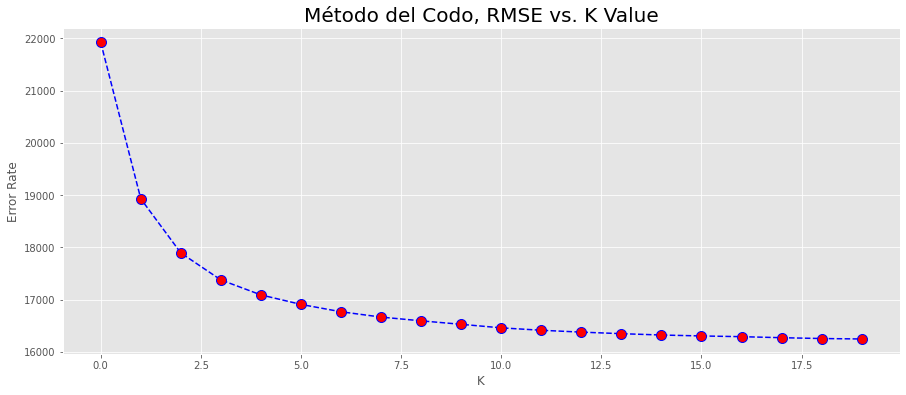

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(15,6))
plt.plot(rmse_val ,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title('Método del Codo, RMSE vs. K Value', size=20)
plt.xlabel('K')
plt.ylabel('Error Rate')

Como comentamos, cuando tomamos $k = 1$, obtenemos un valor **RMSE** relativamente alto. El valor de RMSE disminuye a medida que aumentamos el valor de $k$. En $k = 8$, el RMSE es aproximadamente 0.9910 y se dispara al aumentar aún más el valor de $k$. Podemos decir con seguridad que $k = 10$ nos dará el mejor resultado en este caso.

## **4. Support Vector Regresión**

La máquina de vectores de soporte es la clasificación y los algoritmos de regresión, que minimizan el error entre las predicciones reales y las predicciones al maximizar la distancia entre hiperplanos que contienen datos para varios registros.


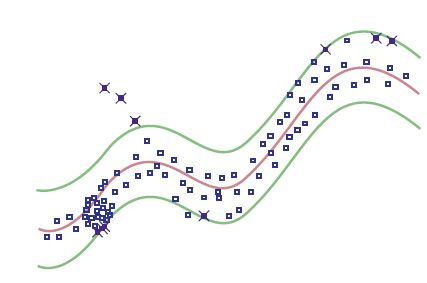

In [ ]:
#@title Ilustración de regresión de máquina de vectores de soporte
from IPython.display import Image
Image("/content/drive/MyDrive/imagenes/svm.JPG")

Las máquinas de vectores de soporte construyen hiperplano (s) con fines de clasificación y regresión (ver grafico arriba). El objetivo es tener la mayor separación entre las dos clases. Esto se asegura maximizando la distancia entre el hiperplano y el punto de datos en cada lado. Durante este proceso, los conjuntos a menudo no se pueden separar linealmente en ese espacio y, por lo tanto, se recomienda mapearlo en un espacio de alta dimensión (es decir, mediante la introducción de núcleos).


**¿Por qué utilizar algoritmos SVR?**

La regresión de vectores de soporte es una variante de la máquina de vectores de soporte (SVM) para la regresión. SVM tiene los siguientes usos.

1. Se puede utilizar para realizar regresiones o clasificaciones con alta dimensión.
2. Con el truco del kernel, SVM es capaz de aplicar regresiones y clasificaciones de conjuntos de datos no lineales.
3. Los algoritmos SVM se utilizan comúnmente para la clasificación ordinal o regresión, por eso se conocen comúnmente como algoritmos de clasificación.

**Desventajas de los algoritmos SVR**

Hay tres desventajas principales de los algoritmos SVR:

1. Gran cantidad de parámetros a optimizar para obtener el mejor rendimiento.
2. La formación puede llevar mucho tiempo en grandes conjuntos de datos.
3. Produce malos resultados si el número de características es mayor que el número de re un conjunto de datos.

### **4.1. Preparación de datos para problemas de regresión.**

Los algoritmos de aprendizaje automático requieren que los datos estén en un formato determinado antes de que los algoritmos puedan entrenarse con los datos. En esta sección, verá varios pasos de preprocesamiento de datos que debe realizar antes de poder entrenar algoritmos de aprendizaje automático utilizando la biblioteca `Sklearn`.

In [ ]:
## Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Para leer un conjunto de datos en particular en el marco de datos de Pandas, pase el nombre del conjunto de datos al método `load_dataset ()` de la biblioteca Seaborn.

La siguiente secuencia de comandos carga el conjunto de datos *Tips* y muestra sus primeras cinco filas.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/insurance.csv", sep=";")
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1           28                   0   > 2 Years   
1    Male   76                1            3                   0    1-2 Year   
2    Male   47                1           28                   0   > 2 Years   
3    Male   21                1           11                   1    < 1 Year   
4  Female   29                1           41                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes           40454                    26      217         1  
1             No           33536                    26      183         0  
2            Yes           38294                    26       27         1  
3             No           28619                   152      203         0  
4             No           27496                   152       39         0

En este capítulo, trabajaremos con el conjunto de datos Tips. Usaremos algoritmos de aprendizaje automático para predecir la **Tip** "propina" de un registro en particular, en función de las características restantes, como "factura_total", "sexo", "día", "hora", etc.

### **4.2  División de datos en funciones y etiquetas**

Como primer paso, dividimos los datos en conjuntos de características y etiquetas. Nuestro conjunto de etiquetas consta de valores de la columna "propina", mientras que el conjunto de características consta de valores de las columnas restantes. El siguiente script divide los datos en conjuntos de características y etiquetas.

In [ ]:
oi=df.sample(frac=0.5)

In [ ]:
X = oi.drop(["Annual_Premium"], axis=1)
y = oi["Annual_Premium"]
#visualizamos los datos
X.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
142623    Male   22                1           21                   1   
228444    Male   55                1           26                   1   
399125    Male   24                1           28                   1   
131032    Male   24                1           11                   1   
23504   Female   45                1           41                   0   

       Vehicle_Age Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  
142623    < 1 Year            Yes                   152      215         0  
228444    1-2 Year             No                    22       36         0  
399125    < 1 Year             No                   152      261         0  
131032    < 1 Year             No                   152      290         0  
23504     1-2 Year            Yes                   124       57         0

Y el siguiente script imprime el conjunto de etiquetas.

In [ ]:
y.head()

142623    33806
228444    29512
399125    19803
131032    53929
23504     33960
Name: Annual_Premium, dtype: int64

### **4.3. Conversión de datos categóricos en números**

Los algoritmos de aprendizaje automático, en su mayor parte, solo pueden funcionar con números. Por lo tanto, es importante convertir los datos categóricos a un formato numérico.

En este sentido, el primer paso es crear un conjunto de datos de todos los valores numéricos. Para hacerlo, elimine las columnas categóricas del conjunto de datos, como se muestra a continuación.

In [ ]:
#Eliminamos las variables categoricas
numerical = X.drop(["Gender", 'Vehicle_Age', 'Vehicle_Damage' ], axis = 1)

El resultado a continuación muestra que el marco de datos "numérico" contiene sólo columnas numéricas.

In [ ]:
#Solo tenemos las variables numéricas
numerical.head()

Age  Driving_License  Region_Code  Previously_Insured  \
142623   22                1           21                   1   
228444   55                1           26                   1   
399125   24                1           28                   1   
131032   24                1           11                   1   
23504    45                1           41                   0   

        Policy_Sales_Channel  Vintage  Response  
142623                   152      215         0  
228444                    22       36         0  
399125                   152      261         0  
131032                   152      290         0  
23504                    124       57         0

A continuación, debe crear un marco de datos que contenga solo columnas categóricas.

In [ ]:
#Guardamos las variables categorica en una variable que se llama categorica
categorical = X.filter(["Gender", 'Vehicle_Age', 'Vehicle_Damage' ])
categorical.head()

Gender Vehicle_Age Vehicle_Damage
142623    Male    < 1 Year            Yes
228444    Male    1-2 Year             No
399125    Male    < 1 Year             No
131032    Male    < 1 Year             No
23504   Female    1-2 Year            Yes

Uno de los enfoques más comunes para convertir una columna categórica en una numérica es mediante la codificación **one-hot**. En la codificación one-hot, para cada valor único en las columnas originales, se crea una nueva columna. Por ejemplo, para el sexo, se crean dos columnas: Femenino y Masculino. Si la columna de sexo original contenía hombre, se agrega un 1 en la columna Hombre recién creada, y se agrega 0 si es mujer.

Sin embargo, se puede observar que realmente no necesitamos dos columnas. Una sola columna, es decir, Mujer es suficiente, ya que cuando un cliente es mujer, podemos agregar 1 en la columna Mujer, de lo contrario, se puede agregar 1 en esa columna. Por lo tanto, necesitamos N-1 columnas codificadas en caliente para todos los N valores en la columna original.

El siguiente script convierte columnas categóricas en columnas codificadas en un solo uso utilizando el método `pd.get_dummies ()`.

In [ ]:
import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

Gender_Male  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
142623            1                     1                      0   
228444            1                     0                      0   
399125            1                     1                      0   
131032            1                     1                      0   
23504             0                     0                      0   

        Vehicle_Damage_Yes  
142623                   1  
228444                   0  
399125                   0  
131032                   0  
23504                    1

La salida muestra las columnas codificadas **one-hot** recién creadas.

El paso final es unir las columnas numéricas con las columnas codificadas en caliente. Para hacerlo, puede usar la función `concat ()` de la biblioteca Pandas como se muestra a continuación:

In [ ]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

Age  Driving_License  Region_Code  Previously_Insured  \
142623   22                1           21                   1   
228444   55                1           26                   1   
399125   24                1           28                   1   
131032   24                1           11                   1   
23504    45                1           41                   0   

        Policy_Sales_Channel  Vintage  Response  Gender_Male  \
142623                   152      215         0            1   
228444                    22       36         0            1   
399125                   152      261         0            1   
131032                   152      290         0            1   
23504                    124       57         0            0   

        Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
142623                     1                      0                   1  
228444                     0                      0                   0  
399125                     1                      0                   0  
131032                     1                      0                   0  
23504                      0                      0                   1

### **4.4. Divida los datos en conjuntos de prueba y entrenamiento**

Después de entrenar un algoritmo de aprendizaje automático, debe evaluarlo para ver qué tan bien funciona con datos invisibles. Por lo tanto, dividimos el conjunto de datos en dos conjuntos, es decir, un conjunto de entrenamiento y un conjunto de prueba. El conjunto de datos se entrena a través del conjunto de entrenamiento y se evalúa en el conjunto de prueba. Para dividir los datos en conjuntos de entrenamiento y prueba, puede usar la función `train_test_split ()` de la biblioteca Sklearn, como se muestra a continuación. El seguimiento El script divide los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### **4.5. Escalado / normalización de datos**

El paso final (opcional) antes de que los datos se pasen a los algoritmos de aprendizaje automático es escalar los datos. Puede ver que algunas columnas del conjunto de datos contienen valores pequeños, mientras que otras contienen valores muy grandes. Es mejor convertir todos los valores a una escala uniforme. Para hacerlo, puede usar la función `StandardScaler ()` del módulo `sklearn.preprocessing`, como se muestra a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

Hemos convertido los datos a un formato que se puede utilizar para entrenar algoritmos de aprendizaje automático para la regresión desde la biblioteca de Sklearn. Los detalles, incluidas las funcionalidades y el uso de todos los algoritmos de aprendizaje automático.

### **4.6 Implementación de SVR con Sklearn**

Con la biblioteca Sklearn, puede usar la clase SVM para implementar algoritmos de regresión vectorial de soporte, como se muestra a continuación.

In [ ]:
# Llamando al objeto
from sklearn import svm
svm_reg = svm.SVR()

# Entrenando nuestro modelo
regressor = svm_reg.fit(X_train, y_train)

# Haciendo la predicciones
y_pred_svr = regressor.predict(X_test)

### **4.7 Tipos de Metricas**

Una vez que haya entrenado un modelo y haya hecho predicciones en el conjunto de prueba, el siguiente paso es saber qué tan bien se ha desempeñado su modelo para hacer predicciones en el conjunto de prueba desconocido. Hay varias métricas para comprobarlo. Sin embargo, el error absoluto medio, el error cuadrático medio y el error cuadrático medio medio son tres de las métricas más comunes.

**Error absoluto medio(Mean Absolute Error MAE)**

El error absoluto medio (MAE) se calcula tomando el promedio del error absoluto obtenido al restar los valores reales de los valores predichos. La ecuación para calcular MAE es:

$$MAE=\frac{\Sigma_{i=1}^{n} |y_i-\hat{y}|}{n} $$

**Error medio cuadrado (Mean Squared Error MSE)**

El error cuadrático medio (MSE) es similar al MAE. Sin embargo, el error para cada registro se eleva al cuadrado en el caso de MSE para castigar los registros de datos con una gran diferencia entre los valores predichos y reales. La ecuación para calcular el error cuadrático medio es la siguiente:

$$MSE=\frac{1}{2} \Sigma_{i=1}^{n} (y_i-\hat{y})^2 $$

**Root Mean Squared Error**

El error cuadrático medio es simplemente la raíz inferior del error cuadrático medio y se puede calcular de la siguiente manera:

$$RMSE=\sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i-\hat{y})^2  } $$

Los métodos utilizados para encontrar el valor de estas métricas están disponibles en la clase `sklearn.metrics`. Los valores predichos y reales deben pasarse a estos métodos, como se muestra en el resultado.

#### **4.7.1 Cálculo de Metrica**

In [ ]:
from sklearn import metrics

print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_svr))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_svr))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_svr))

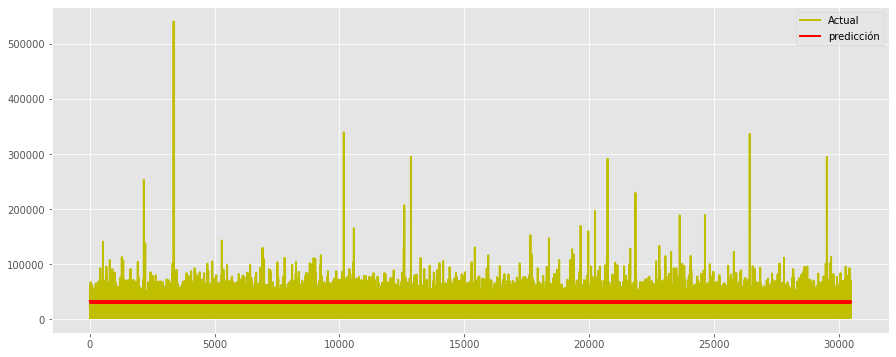

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_svr, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

**¿Qué modelo usar?**

Los resultados obtenidos de las secciones 1 a 5 muestran que los algoritmos del regresor de bosque aleatorio dan como resultado los valores mínimos de MAE, MSE y RMSE. El algoritmo que elija utilizar depende totalmente de su conjunto de datos y métricas de evaluación. Algunos algoritmos funcionan mejor en un conjunto de datos, mientras que otros algoritmos funcionan mejor en el otro conjunto de datos. Es mejor que uses todos los algoritmos para ver cuál da los mejores resultados. Sin embargo, si tiene opciones limitadas, es mejor comenzar con algoritmos de aprendizaje por conjuntos como Random Forest. Dan el mejor resultado.

## **5.Árbol de Decisión**

### **5.1. Introducción al algoritmo del árbol de decisiones** 

Un algoritmo de árbol de decisiones es uno de los algoritmos de aprendizaje automático más populares. Utiliza una estructura similar a un árbol y sus posibles combinaciones para resolver un problema en particular. Pertenece a la clase de algoritmos de aprendizaje supervisado donde se puede utilizar tanto para fines de clasificación como de regresión.


Un árbol de decisión es una estructura que incluye un nodo raíz, ramas y nodos hoja. Cada nodo interno denota una prueba en un atributo, cada rama denota el resultado de una prueba y cada nodo hoja contiene una etiqueta de clase. El nodo superior del árbol es el nodo raíz.


Hacemos algunas suposiciones al implementar el algoritmo Decision-Tree. Estos se enumeran a continuación: -

1. Al principio, todo el conjunto de entrenamiento se considera como raíz.
2. Los valores de las características deben ser categóricos. Si los valores son continuos, se discretizan antes de construir el modelo.
3. Los registros se distribuyen recursivamente sobre la base de los valores de los atributos.
4. El orden para colocar atributos como raíz o nodo interno del árbol se realiza mediante algún enfoque estadístico.

### **5.2. Árboles de clasificación y regresión (CART)**

Hoy en día, el algoritmo del árbol de decisiones se conoce por su nombre moderno **CART**, que significa **árboles de clasificación y regresión**. Los árboles de clasificación y regresión o **CART** es un término introducido por Leo Breiman para referirse a los algoritmos de árboles de decisión que se pueden usar para problemas de modelado de clasificación y regresión.


El algoritmo CART proporciona una base para otros algoritmos importantes, como árboles de decisión empaquetados, bosques aleatorios y árboles de decisión potenciados. En este núcleo, resolveré un problema de clasificación. Por lo tanto, me referiré al algoritmo también como problema de Clasificación del Árbol de Decisión.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(criterion = 'squared_error',
                                     max_depth = 10,
                                     min_samples_leaf = 10
                                     )

dtr = dec_tree_reg.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

### 5.1 Cálculo de Métricas

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_dtr))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_dtr))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_dtr))

Mean Absolute Error: 9904.717923840833
Mean Squared Error: 232967987.32322237
Root Mean Squared Error: 15263.288876360244
Coefficient of determination: 0.25


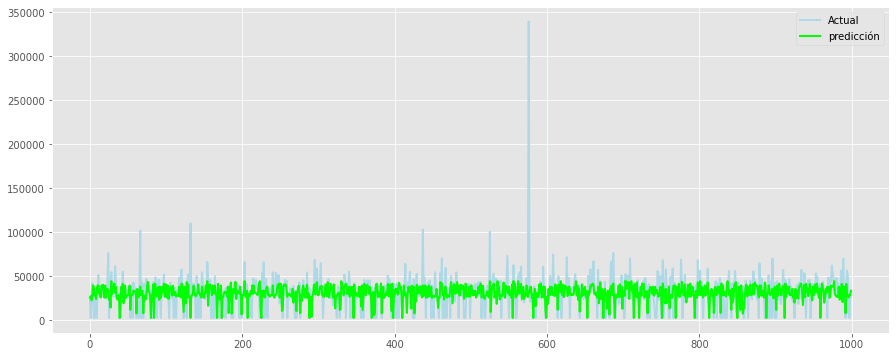

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test.iloc[0:1000]),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_dtr[0:1000], c="lime", label="predicción", linewidth=2)

plt.legend(loc='best')
plt.show();

## **6. Random Forest Regresión**

El bosque aleatorio es un algoritmo basado en árboles que convierte características en nodos de árbol y luego usa la pérdida de entropía para hacer predicciones.




**¿Por qué utilizar algoritmos de bosque aleatorio?**

Los algoritmos de bosque aleatorio son particularmente útiles cuando:

1. Tiene muchos datos faltantes o un conjunto de datos desequilibrado.
2. Con una gran cantidad de árboles, puede evitar el sobreajuste durante el entrenamiento. El sobreajuste ocurre cuando los modelos de aprendizaje automático funcionan mejor en el conjunto de entrenamiento pero en el conjunto de prueba.
3. El algoritmo de bosque aleatorio se puede utilizar cuando tiene datos dimensionales muy altos.
4. A través de la validación cruzada, el algoritmo de bosque aleatorio puede devolver mayor acc
5. El algoritmo de bosque aleatorio puede resolver tanto la clasificación como la regresión y encuentra su aplicación en una variedad de tareas que van desde la detección de fraude con tarjetas de crédito, la predicción del mercado de valores y la búsqueda de transacciones fraudulentas en línea.

**Desventajas de los algoritmos de bosque aleatorio**

Hay dos desventajas principales de los algoritmos de bosque aleatorio:

1. El uso de una gran cantidad de árboles puede ralentizar el algoritmo.
2. El algoritmo de bosque aleatorio es un algoritmo predictivo, que solo puede predecir el futuro y no puede explicar lo que sucedió en el pasado utilizando el conjunto de datos.

### **6.1. Preparación de datos para problemas de regresión.**

Los algoritmos de aprendizaje automático requieren que los datos estén en un formato determinado antes de que los algoritmos puedan entrenarse con los datos. En esta sección, verá varios pasos de preprocesamiento de datos que debe realizar antes de poder entrenar algoritmos de aprendizaje automático utilizando la biblioteca `Sklearn`.

Para leer un conjunto de datos en particular en el marco de datos de Pandas.

In [ ]:
## Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/insurance.csv", sep=";")
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1           28                   0   > 2 Years   
1    Male   76                1            3                   0    1-2 Year   
2    Male   47                1           28                   0   > 2 Years   
3    Male   21                1           11                   1    < 1 Year   
4  Female   29                1           41                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes           40454                    26      217         1  
1             No           33536                    26      183         0  
2            Yes           38294                    26       27         1  
3             No           28619                   152      203         0  
4             No           27496                   152       39         0

### **6.2  División de datos en funciones y etiquetas**

Como primer paso, dividimos los datos en conjuntos de características y etiquetas. Nuestro conjunto de etiquetas consta de valores de la columna "propina", mientras que el conjunto de características consta de valores de las columnas restantes. El siguiente script divide los datos en conjuntos de características y etiquetas.

In [ ]:
X = df.drop(["Annual_Premium"], axis=1)
y = df["Annual_Premium"]
#visualizamos los datos
X.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1           28                   0   > 2 Years   
1    Male   76                1            3                   0    1-2 Year   
2    Male   47                1           28                   0   > 2 Years   
3    Male   21                1           11                   1    < 1 Year   
4  Female   29                1           41                   1    < 1 Year   

  Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  
0            Yes                    26      217         1  
1             No                    26      183         0  
2            Yes                    26       27         1  
3             No                   152      203         0  
4             No                   152       39         0

Y el siguiente script imprime el conjunto de etiquetas.

In [ ]:
y.head()

0    40454
1    33536
2    38294
3    28619
4    27496
Name: Annual_Premium, dtype: int64

### **6.3. Conversión de datos categóricos en números**

Los algoritmos de aprendizaje automático, en su mayor parte, solo pueden funcionar con números. Por lo tanto, es importante convertir los datos categóricos a un formato numérico.

En este sentido, el primer paso es crear un conjunto de datos de todos los valores numéricos. Para hacerlo, elimine las columnas categóricas del conjunto de datos, como se muestra a continuación.

In [ ]:
#Eliminamos las variables categoricas
numerical = X.drop(["Gender", 'Vehicle_Age', 'Vehicle_Damage' ], axis = 1)

El resultado a continuación muestra que el marco de datos "numérico" contiene sólo columnas numéricas.

In [ ]:
#Solo tenemos las variables numéricas
numerical.head()

Age  Driving_License  Region_Code  Previously_Insured  \
0   44                1           28                   0   
1   76                1            3                   0   
2   47                1           28                   0   
3   21                1           11                   1   
4   29                1           41                   1   

   Policy_Sales_Channel  Vintage  Response  
0                    26      217         1  
1                    26      183         0  
2                    26       27         1  
3                   152      203         0  
4                   152       39         0

A continuación, debe crear un marco de datos que contenga solo columnas categóricas.

In [ ]:
#Guardamos las variables categorica en una variable que se llama categorica
categorical = X.filter(["Gender", 'Vehicle_Age', 'Vehicle_Damage' ])
categorical.head()

Gender Vehicle_Age Vehicle_Damage
0    Male   > 2 Years            Yes
1    Male    1-2 Year             No
2    Male   > 2 Years            Yes
3    Male    < 1 Year             No
4  Female    < 1 Year             No

Uno de los enfoques más comunes para convertir una columna categórica en una numérica es mediante la codificación **one-hot**. En la codificación one-hot, para cada valor único en las columnas originales, se crea una nueva columna. Por ejemplo, para el sexo, se crean dos columnas: Femenino y Masculino. Si la columna de sexo original contenía hombre, se agrega un 1 en la columna Hombre recién creada, y se agrega 0 si es mujer.

Sin embargo, se puede observar que realmente no necesitamos dos columnas. Una sola columna, es decir, Mujer es suficiente, ya que cuando un cliente es mujer, podemos agregar 1 en la columna Mujer, de lo contrario, se puede agregar 1 en esa columna. Por lo tanto, necesitamos N-1 columnas codificadas en caliente para todos los N valores en la columna original.

El siguiente script convierte columnas categóricas en columnas codificadas en un solo uso utilizando el método `pd.get_dummies ()`.

In [ ]:
import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

Gender_Male  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
0            1                     0                      1   
1            1                     0                      0   
2            1                     0                      1   
3            1                     1                      0   
4            0                     1                      0   

   Vehicle_Damage_Yes  
0                   1  
1                   0  
2                   1  
3                   0  
4                   0

La salida muestra las columnas codificadas **one-hot** recién creadas.

El paso final es unir las columnas numéricas con las columnas codificadas en caliente. Para hacerlo, puede usar la función `concat ()` de la biblioteca Pandas como se muestra a continuación:

In [ ]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

Age  Driving_License  Region_Code  Previously_Insured  \
0   44                1           28                   0   
1   76                1            3                   0   
2   47                1           28                   0   
3   21                1           11                   1   
4   29                1           41                   1   

   Policy_Sales_Channel  Vintage  Response  Gender_Male  Vehicle_Age_< 1 Year  \
0                    26      217         1            1                     0   
1                    26      183         0            1                     0   
2                    26       27         1            1                     0   
3                   152      203         0            1                     1   
4                   152       39         0            0                     1   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                      1                   1  
1                      0                   0  
2                      1                   1  
3                      0                   0  
4                      0                   0

### **6.4. Divida los datos en conjuntos de prueba y entrenamiento**

Después de entrenar un algoritmo de aprendizaje automático, debe evaluarlo para ver qué tan bien funciona con datos invisibles. Por lo tanto, dividimos el conjunto de datos en dos conjuntos, es decir, un conjunto de entrenamiento y un conjunto de prueba. El conjunto de datos se entrena a través del conjunto de entrenamiento y se evalúa en el conjunto de prueba. Para dividir los datos en conjuntos de entrenamiento y prueba, puede usar la función `train_test_split ()` de la biblioteca Sklearn, como se muestra a continuación. El seguimiento El script divide los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### **6.5. Escalado / normalización de datos**

El paso final (opcional) antes de que los datos se pasen a los algoritmos de aprendizaje automático es escalar los datos. Puede ver que algunas columnas del conjunto de datos contienen valores pequeños, mientras que otras contienen valores muy grandes. Es mejor convertir todos los valores a una escala uniforme. Para hacerlo, puede usar la función `StandardScaler ()` del módulo `sklearn.preprocessing`, como se muestra a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

Hemos convertido los datos a un formato que se puede utilizar para entrenar algoritmos de aprendizaje automático para la regresión desde la biblioteca de Sklearn. Los detalles, incluidas las funcionalidades y el uso de todos los algoritmos de aprendizaje automático.

### **6.6 Implementación de un regresor de bosque aleatorio mediante Sklearn**

La clase `RandomForestRegressor` del módulo Sklearn.ensemble se puede usar para implementar algoritmos de regresores forestales aleatorios, como se muestra a continuación.

In [ ]:
# Cargamos la libreria 
from sklearn.ensemble import RandomForestRegressor
#cargamos la función 
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)#500 árboles

#Entrenamos el modelo
regressor = rf_reg.fit(X_train, y_train)

#Hacemos las predicciones
y_pred_rf = regressor.predict(X_test)

KeyboardInterrupt: ignored

### **6.7 Tipos de Metricas**

Una vez que haya entrenado un modelo y haya hecho predicciones en el conjunto de prueba, el siguiente paso es saber qué tan bien se ha desempeñado su modelo para hacer predicciones en el conjunto de prueba desconocido. Hay varias métricas para comprobarlo. Sin embargo, el error absoluto medio, el error cuadrático medio y el error cuadrático medio medio son tres de las métricas más comunes.

**Error absoluto medio(Mean Absolute Error MAE)**

El error absoluto medio (MAE) se calcula tomando el promedio del error absoluto obtenido al restar los valores reales de los valores predichos. La ecuación para calcular MAE es:

$$MAE=\frac{\Sigma_{i=1}^{n} |y_i-\hat{y}|}{n} $$

**Error medio cuadrado (Mean Squared Error MSE)**

El error cuadrático medio (MSE) es similar al MAE. Sin embargo, el error para cada registro se eleva al cuadrado en el caso de MSE para castigar los registros de datos con una gran diferencia entre los valores predichos y reales. La ecuación para calcular el error cuadrático medio es la siguiente:

$$MSE=\frac{1}{2} \Sigma_{i=1}^{n} (y_i-\hat{y})^2 $$

**Root Mean Squared Error**

El error cuadrático medio es simplemente la raíz inferior del error cuadrático medio y se puede calcular de la siguiente manera:

$$RMSE=\sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i-\hat{y})^2  } $$

Los métodos utilizados para encontrar el valor de estas métricas están disponibles en la clase `sklearn.metrics`. Los valores predichos y reales deben pasarse a estos métodos, como se muestra en el resultado.

#### **6.7.1Cálculo de Metrica**

In [ ]:
# evaluating algorithm performance
from sklearn import metrics

print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_rf))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_rf))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_rf))

Mean Absolute Error: 10944.459816120545
Mean Squared Error: 256735656.39622897
Root Mean Squared Error: 16022.972770251748
Coefficient of determination: 0.14


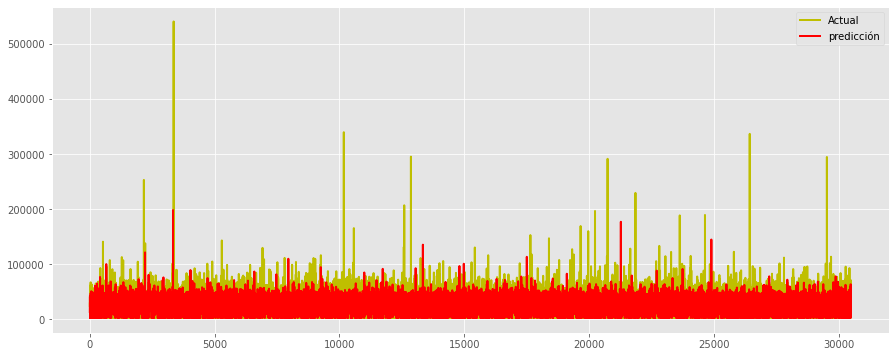

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_rf, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

## 7.Comparación de modelos

In [ ]:
import pandas as pd
modelos = pd.DataFrame({
    'Model': ["Regresión Lineal","KNN", "Random Forest","SVR", "Arbol Decisión"] ,
     "R2":[r2_score(y_test, y_pred_lr)*100 ,r2_score(y_test, y_pred_knn)*100 ,r2_score(y_test, y_pred_rf)*100,
           r2_score(y_test, y_pred_svr)*100, r2_score(y_test, y_pred_dtr)*100],
     "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)) ,np.sqrt(mean_squared_error(y_test, y_pred_knn))
                   ,np.sqrt(mean_squared_error(y_test, y_pred_rf)), np.sqrt(mean_squared_error(y_test, y_pred_svr)),
              np.sqrt(mean_squared_error(y_test, y_pred_dtr))]   })

modelos

Model         R2          RMSE
0  Regresión Lineal   1.794202  17117.277137
1               KNN   1.149823  17173.342959
2     Random Forest  13.949390  16022.972770
3               SVR   0.301381  17246.885868
4    Arbol Decisión  24.398493  15018.665452

In [ ]:
import plotly.express as px
fig = px.bar (modelos, x="Model", 
                   y="R2", 
                       template = "plotly_dark",
                   color_discrete_sequence=['lime', 'blue'], 
                   title='R2')
fig.update_layout(bargap=0.6)
fig.show();

In [ ]:
import plotly.express as px
fig = px.bar (modelos, x="Model", 
                   y="RMSE", 
                       template = "plotly_dark",
                   color_discrete_sequence=[ 'blue'], 
                   title='RMSE')
fig.update_layout(bargap=0.6)
fig.show();

## 8.Predicciones

In [ ]:
Age	Driving_License	Region_Code	Previously_Insured	Policy_Sales_Channel	Vintage	Response	Gender_Male	Vehicle_Age_< 1 Year	Vehicle_Age_> 2 Years	Vehicle_Damage_Yes
0	42	1	8	0	152	78	0	1	0	0	1
1	29	1	29	1	152	137	0	1	1	0	0

In [ ]:
prueba=pd.DataFrame({"Age":[65,30],"Driving_License":[1,0],"Region_Code":[8,4]	,"Previously_Insured":[0,1],"Policy_Sales_Channel":[152, 26],
                     "Vintage":[78,9],"Response":[0,1]	,"Gender_Male":[0,1],		"Vehicle_Age_< 1 Year":[1,0], 
										           "Vehicle_Age_> 2 Years":[0,1], "Vehicle_Damage_Yes":[1,0],
                     	 } )
                 
prueba


Age  Driving_License  Region_Code  Previously_Insured  \
0   65                1            8                   0   
1   30                0            4                   1   

   Policy_Sales_Channel  Vintage  Response  Gender_Male  Vehicle_Age_< 1 Year  \
0                   152       78         0            0                     1   
1                    26        9         1            1                     0   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                      0                   1  
1                      1                   0

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
prueba = sc.fit_transform(prueba)


Hemos selecionado Árbol de decisión

In [ ]:
dtr.predict(prueba)

array([19151.79775281, 25194.39676747])

In [ ]:
df['Annual_Premium'].describe()

count    152444.000000
mean      30487.510227
std       17090.058807
min        2630.000000
25%       24379.000000
50%       31634.000000
75%       39339.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

#DATA & ANALYTICS





Web: www.datayanalytics.com